**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje Supervisado**

*Edición 2022*

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

## **Descripción del problema**

Año 2912. La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debemos predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

Los resgistron contienen la siguiente información:

*  **PassengerId**: Número entero que identifica a cada pasajero.

* **HomePlanet**: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

* **CryoSleep**: Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

* **Cabin**: El número de cabina donde se hospeda el pasajero. Toma la forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor.

* **Destination**: El planeta al que desembarcará el pasajero o la pasajera.

* **Age**: La edad del pasajero.

* **VIP**: Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

* **RoomService**: Importe que la pasajera o el pasajero ha facturado al servicio de habitaciones.

* **FoodCourt**: Importe que la pasajera o el pasajero ha facturado al servicio de zona de comidas.

* **ShoppingMall**: Importe que la pasajera o el pasajero ha facturado al servicio de shopping.

* **Spa**: Importe que la pasajera o el pasajero ha facturado al servicio de spa.

* **VRDeck**: Importe que la pasajera o el pasajero ha facturado al servicio de VRDeck.

* **Name**:  Los nombres y apellidos de los pasajeros y las pasajeras.

* **Transported**: Si el pasajero fue transportado a otra dimensión (1=transportado, 0=no transportado). **Este es el objetivo, la columna que vamos a tratar de predecir**.


Importamos las librerías necesarias.

In [1]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier

Cargamos las bases de datos.

In [2]:
# Importamos la base desde la computadora
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# Cargamos las bases en pandas
import io
df_test= pd.read_csv(io.BytesIO(uploaded['test.csv']), encoding='utf-8')
df_train= pd.read_csv(io.BytesIO(uploaded['train.csv']), encoding='utf-8')
# Dataset is now stored in a Pandas Dataframe

# Análisis exploratorio

In [4]:
# Una ojeada a la base de entrenamiento
df_train[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


In [5]:
# Una ojeada a la base de test
df_test[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive


In [6]:
len(df_test)

870

In [7]:
# Información de la base de entrenamiento
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


In [8]:
#Tamaño de la base
print(df_train.shape)

(7823, 14)


La base para entrenamiento tiene 7823 casos y 14 variables. Además del ID, contamos con 6 variables categóricas, 6 variables numéricas y la variable target (Transported).

In [9]:
# Descriptivas de la base de entrenamiento (variables numéricas)
df_train.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [10]:
# Descriptivas de la base de entrenamiento (variables categóricas)
df_train.describe(include=['O'])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,7644,7627,7639,7663,7639,7639
unique,3,2,6009,3,2,7623
top,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive
freq,4114,4871,8,5316,7456,2


In [11]:
# Cantidad de valores perdidos para la base de entrenamiento en cada variable
df_train.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [12]:
196/7823*100

2.5054326984532787

La variable con mayor cantidad de valores perdidos es CryoSleep con 196 perdidos que corresponde al $\frac{196}{7823}*100 = 2.5\%$ del total de datos de la base de entrenamiento. 

A continuación exploramos la variable target **Transported**.

In [13]:
# Frecuencias para Transported
df_train['Transported'].value_counts()

1    3964
0    3859
Name: Transported, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


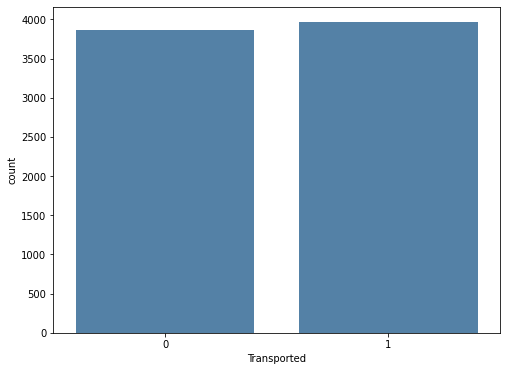

In [14]:
# Gráfico de barras Transported
fig = plt.figure(figsize=(8,6))
sns.countplot(df_train.Transported, color='steelblue')
plt.show()

Notar que 3964 pasajeros fueron transportados y 3859 no fueron transportados. El dataser está balanceado en cuanto a la variable target. 

A continuacion realizamos análisis bivariado para estudiar correlaciones entre la variable Transported y los demás features.

## Transported vs. HomePlanet

In [15]:
# Frecuencias para HomePlanet
df_train['HomePlanet'].value_counts()

Earth     4114
Europa    1935
Mars      1595
Name: HomePlanet, dtype: int64

In [16]:
# Frecuencias para HomePlanet
df_train['HomePlanet'].value_counts(normalize=True)

Earth     0.53820
Europa    0.25314
Mars      0.20866
Name: HomePlanet, dtype: float64

In [17]:
## Tabla de contingencia
tabla=pd.crosstab(df_train.HomePlanet, df_train.Transported, normalize=False)
tabla

Transported,0,1
HomePlanet,,
Earth,2352,1762
Europa,653,1282
Mars,768,827


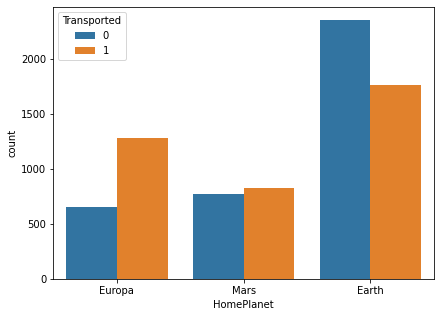

In [18]:
# Gráfico de barras Transported vs. HomePlanet
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['HomePlanet'],hue=df_train['Transported'])

In [19]:
## Tabla de contingencia normalizada por planeta (filas)
pd.crosstab(df_train.HomePlanet, df_train.Transported, normalize='index')

Transported,0,1
HomePlanet,,
Earth,0.571706,0.428294
Europa,0.337468,0.662532
Mars,0.481505,0.518495


De esta tabla podemos concluir que:
* Dado que el pasajero proviene del planeta Tierra, la probabilidad de no ser transportado es mayor a la de ser transportado.
* Dado que el pasajero proviene del planeta Europa, la probabilidad de ser transportado es mayor a la de no ser transportado.
* Dado que el pasajero proviene del planeta Marte, la probabilidad de ser transportado es mayor a la de no ser transportado.

In [20]:
## Tabla de contingencia normalizada por Transported (columnas)
pd.crosstab(df_train.HomePlanet, df_train.Transported, normalize='columns')

Transported,0,1
HomePlanet,,
Earth,0.623377,0.455180
Europa,0.173072,0.331181
Mars,0.203552,0.213640


De la tabla anterior podemos concluir que:
* Dentro de los pasajeros no transportados, la mayoría son del planeta Tierra y la minoría del planeta Europa.
* Dentro de los pasajeros transportados, la mayoría son del planeta tierra y la minoría del planeta Marte. 

Notar que hay más pasajeros del planeta tierra (4114) que del planeta Europa (1935) y del planeta Marte (1595).

In [21]:
# Chi cuadrado test
#H0: las variables son independientes
#H1: no son independientes
scipy.stats.chi2_contingency(observed= tabla)

(290.0528574841634,
 1.0371038994303547e-63,
 2,
 array([[2030.62820513, 2083.37179487],
        [ 955.09615385,  979.90384615],
        [ 787.27564103,  807.72435897]]))

Como el p-valor de la prueba chi-cuadrado para independencia es menor a 0.05, concluimos que las variables Transported y HomePlanet NO son independientes.

**Podemos concluir que hay correlación entre las variables Transported y HomePlanet.**

## Transported vs. CryoSleep

In [22]:
# Frecuencias para CryoSleep
df_train['CryoSleep'].value_counts()

False    4871
True     2756
Name: CryoSleep, dtype: int64

In [23]:
# Frecuencias 
df_train['CryoSleep'].value_counts(normalize=True)

False    0.638652
True     0.361348
Name: CryoSleep, dtype: float64

In [24]:
## Tabla de contingencia 
tabla=pd.crosstab(df_train.CryoSleep, df_train.Transported, normalize=False)
tabla

Transported,0,1
CryoSleep,,
False,3267,1604
True,493,2263


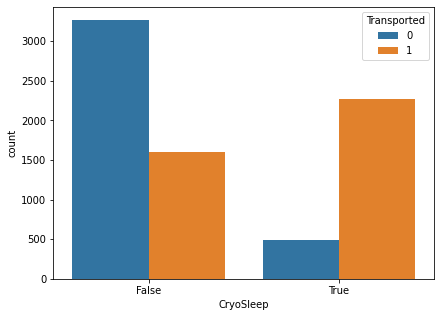

In [25]:
# Gráfico de barras Transported vs. CryoSleep
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['CryoSleep'],hue=df_train['Transported'])

In [26]:
## Tabla de contingencia normalizada (filas)
pd.crosstab(df_train.CryoSleep, df_train.Transported, normalize='index')

Transported,0,1
CryoSleep,,
False,0.670704,0.329296
True,0.178882,0.821118


De esta tabla podemos concluir que:
* Dado que el pasajero no se encontraba en CryoSleep, la probabilidad de no ser transportado es mayor a la de ser transportado.
* Dado que el pasajero se encontraba en CryoSleep, la probabilidad de ser transportado es mucho mayor a la de no ser transportado.

In [27]:
## Tabla de contingencia normalizada (columnas)
pd.crosstab(df_train.CryoSleep, df_train.Transported, normalize='columns')

Transported,0,1
CryoSleep,,
False,0.868883,0.414792
True,0.131117,0.585208


De la tabla anterior podemos concluir que:
* Dentro de los pasajeros no transportados, la mayoría no estaban en CryoSleep.
* Dentro de los pasajeros transportados, la mayoría estaban en CryoSleep.


In [28]:
# Chi cuadrado test
#H0: las variables son independientes
#H1: no son independientes
scipy.stats.chi2_contingency(observed= tabla)

(1701.3852558805734, 0.0, 1, array([[2401.33210961, 2469.66789039],
        [1358.66789039, 1397.33210961]]))

Como el p-valor de la prueba chi-cuadrado para independencia es menor a 0.05, concluimos que las variables Transported y CryoSleep NO son independientes.

**Podemos concluir que hay correlación entre las variables Transported y CryoSleep.** CryoSleep parece ser un buen predictor de si un pasajero es transportado.

## Transported vs. Destination

In [29]:
# Frecuencias para Destination
df_train['Destination'].value_counts()

TRAPPIST-1e      5316
55 Cancri e      1625
PSO J318.5-22     722
Name: Destination, dtype: int64

In [30]:
# Frecuencias para Destination
df_train['Destination'].value_counts(normalize=True)

TRAPPIST-1e      0.693723
55 Cancri e      0.212058
PSO J318.5-22    0.094219
Name: Destination, dtype: float64

In [31]:
## Tabla de contingencia 
tabla=pd.crosstab(df_train.Destination, df_train.Transported, normalize=False)
tabla

Transported,0,1
Destination,,
55 Cancri e,621,1004
PSO J318.5-22,355,367
TRAPPIST-1e,2803,2513


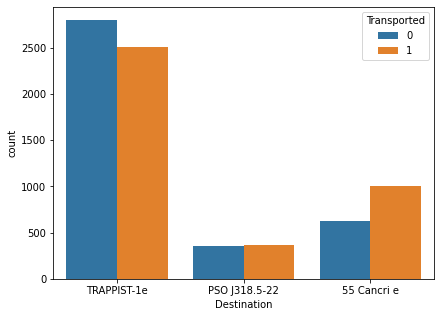

In [32]:
# Gráfico de barras Transported vs. Destination
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['Destination'],hue=df_train['Transported'])

In [33]:
## Tabla de contingencia normalizada (filas)
pd.crosstab(df_train.Destination, df_train.Transported, normalize='index')

Transported,0,1
Destination,,
55 Cancri e,0.382154,0.617846
PSO J318.5-22,0.491690,0.508310
TRAPPIST-1e,0.527276,0.472724


De esta tabla podemos concluir que:
* Dado que el pasajero tenía como destino 55 Cancri e, la probabilidad de ser transportado es mayor a la de no ser transportado.
* Dado que el pasajero tenía como destino PSO J318.5-22, la probabilidad de ser transportado es mayor a la de no ser transportado.
* Dado que el pasajero tenía como destino TRAPPIST-1e, la probabilidad de no ser transportado es mayor a la de ser transportado.

In [34]:
## Tabla de contingencia normalizada (columnas)
pd.crosstab(df_train.Destination, df_train.Transported, normalize='columns')

Transported,0,1
Destination,,
55 Cancri e,0.164329,0.258496
PSO J318.5-22,0.093940,0.094490
TRAPPIST-1e,0.741731,0.647013


De la tabla anterior podemos concluir que:
* Dentro de los pasajeros no transportados, la mayoría se dirigía a TRAPPIST-1e y la minoría a PSO J318.5-22.
* Dentro de los pasajeros transportados, la mayoría se dirigía a TRAPPIST-1e y la minoría a PSO J318.5-22.

Notar que la mayoría de los pasajeros se dirigían a TRAPPIST-1e (5316) y la minoría a PSO J318.5-22 (722).

In [35]:
# Chi cuadrado test
#H0: las variables son independientes
#H1: no son independientes
scipy.stats.chi2_contingency(observed= tabla)

(104.87072332396261,
 1.6889304805964796e-23,
 2,
 array([[ 801.36695811,  823.63304189],
        [ 356.05350385,  365.94649615],
        [2621.57953804, 2694.42046196]]))

Como el p-valor de la prueba chi-cuadrado para independencia es menor a 0.05, concluimos que las variables Transported y Destination NO son independientes.

**Podemos concluir que hay correlación entre las variables Transported y Destination.** Los pasajeros que van a 5 Cancri-e tienen más probabilidades de ser transportados en comparación con otros destinos.

## Transported vs. VIP

In [36]:
# Frecuencias 
df_train['VIP'].value_counts()

False    7456
True      183
Name: VIP, dtype: int64

In [37]:
# Frecuencias 
df_train['VIP'].value_counts(normalize=True)

False    0.976044
True     0.023956
Name: VIP, dtype: float64

In [38]:
## Tabla de contingencia 
tabla=pd.crosstab(df_train.VIP, df_train.Transported, normalize=False)
tabla

Transported,0,1
VIP,,
False,3653,3803
True,116,67


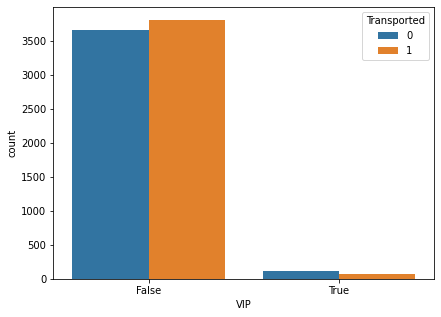

In [39]:
# Gráfico de barras 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['VIP'],hue=df_train['Transported'])

In [40]:
## Tabla de contingencia normalizada (filas)
pd.crosstab(df_train.VIP, df_train.Transported, normalize='index')

Transported,0,1
VIP,,
False,0.489941,0.510059
True,0.633880,0.366120


De esta tabla podemos concluir que:
* Dado que el pasajero era VIP, la probabilidad de no ser transportado es mayor a la de ser transportado.
* Dado que el pasajero no era VIP, la probabilidad de ser transportado es mayor a la de no ser transportado.


In [41]:
## Tabla de contingencia normalizada (columnas)
pd.crosstab(df_train.VIP, df_train.Transported, normalize='columns')

Transported,0,1
VIP,,
False,0.969223,0.982687
True,0.030777,0.017313


De la tabla anterior podemos concluir que:
* Dentro de los pasajeros no transportados, la mayoría no eran VIP.
* Dentro de los pasajeros transportados, la mayoría no eran VIP.

Notar que la mayoría de los pasajeros no son VIP (7456).

In [42]:
# Chi cuadrado test
#H0: las variables son independientes
#H1: no son independientes
scipy.stats.chi2_contingency(observed= tabla)

(14.234870070595111,
 0.0001613527728958745,
 1,
 array([[3678.70977877, 3777.29022123],
        [  90.29022123,   92.70977877]]))

Como el p-valor de la prueba chi-cuadrado para independencia es menor a 0.05, concluimos que las variables Transported y VIP NO son independientes.

**Podemos concluir que hay correlación entre las variables Transported y VIP.**

## Tansported vs. Age

In [43]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3779.0,29.949722,13.668894,0.0,21.0,27.0,38.0,79.0
1,3882.0,27.837455,15.122658,0.0,18.0,26.0,37.0,78.0


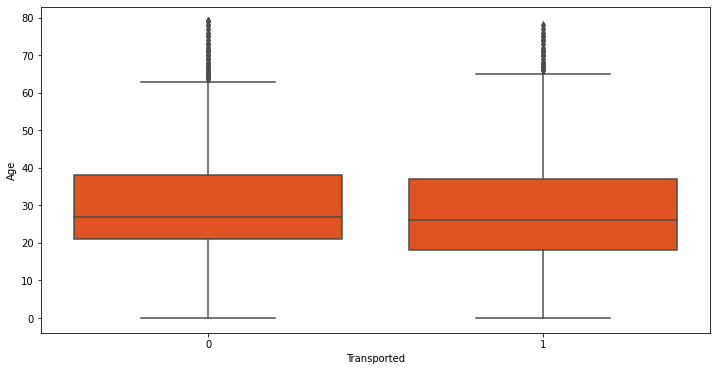

In [44]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='Age',
                color='orangered')

Tanto la media como la mediana de edades para los transportados es menor que para los no transportados.

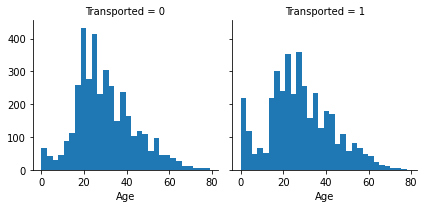

In [45]:
# distribuciones de edad para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'Age', bins=30)
plt.show()

Text(0.5, 1.0, '% de pasajeros Transportados por grupo de edad')

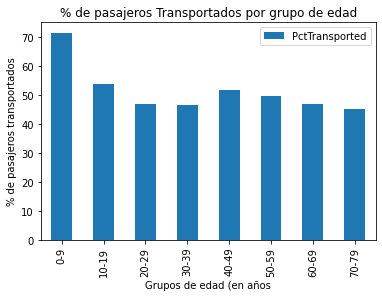

In [46]:
# Pasajeros transportados por grupos de edad
agegroup_mapper = {0:'0-9', 1:'10-19', 2:'20-29', 3:'30-39', 4:'40-49', 5:'50-59', 6:'60-69', 7:'70-79', 8:'80-89'}
df_train['AgeGroup'] = df_train['Age'].apply(lambda x: np.floor(x/10)).map(agegroup_mapper)
ax = (pd.pivot_table(df_train, index = 'AgeGroup', columns = 'Transported', values = 'PassengerId', aggfunc = 'count')
      .rename(columns = {True: 'True', False:'False'})
      .assign(PctTransported = lambda x: x['True']/(x['True']+x['False'])*100)
      .reset_index()
      .plot(kind = 'bar', x = 'AgeGroup', y = 'PctTransported'))
ax.set_ylabel('% de pasajeros transportados')
ax.set_xlabel('Grupos de edad (en años')
ax.set_title('% de pasajeros Transportados por grupo de edad')

El grupo de edad más joven, entre 0 y 9 años, tiene la mayor probabilidad de ser transportado.

In [47]:
# t test para diferencia de medias (n grande)
scipy.stats.ttest_ind(df_train[df_train['Transported']== 1]['Age'],df_train[df_train['Transported']== 0]['Age'], nan_policy='omit')

Ttest_indResult(statistic=-6.40826405270966, pvalue=1.558965936445616e-10)

Como el p-valor del t-test para diferencia de medias de muestras independientes es menor a 0.05, concluimos que hay diferencias significativas entre la media de edad de los transportados y la media de edad de los no transportados, siendo menor la media de edad de los transportados. 

**Podemos concluir que hay correlación entre las variables Transported y Age.**

## Análisis de correlación entre las variables de servicios pagados.

RoomService, FoodCourt, ShoppingMall, Spa y VRDeck

In [48]:
# Análisis de correlación
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
correlation = df_train[cols].corr()
correlation.style.background_gradient(cmap='coolwarm')

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
RoomService,1.000000,-0.013005,0.058135,0.016298,-0.015428
FoodCourt,-0.013005,1.000000,-0.019683,0.213996,0.201737
ShoppingMall,0.058135,-0.019683,1.000000,0.014820,-0.004502
Spa,0.016298,0.213996,0.014820,1.000000,0.141536
VRDeck,-0.015428,0.201737,-0.004502,0.141536,1.000000


Las variables Spa, VRDeck y FoodCourt se encuentran levemente correlacionadas. 

## Transported vs. RoomService

In [49]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['RoomService'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3774.0,396.153153,897.101722,0.0,0.0,1.0,478.5,14327.0
1,3895.0,61.286778,270.878072,0.0,0.0,0.0,0.0,3992.0


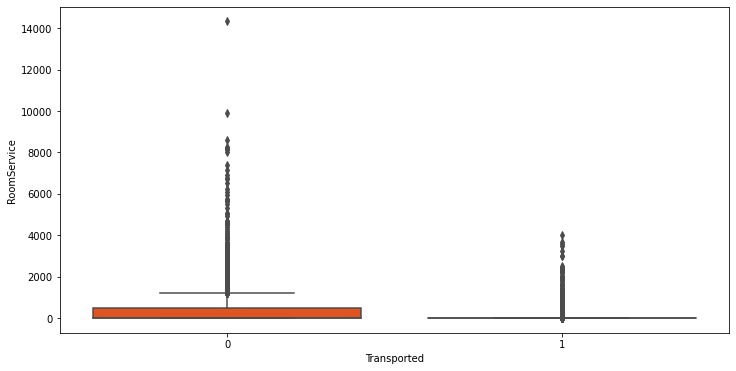

In [50]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='RoomService',
                color='orangered')

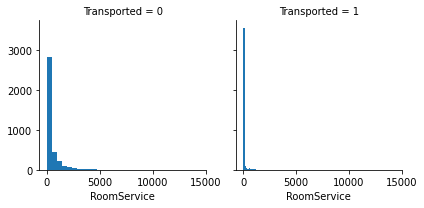

In [51]:
# distribuciones para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'RoomService', bins=30)
plt.show()

In [52]:
# t test para diferencia de medias (n grande)
scipy.stats.ttest_ind(df_train[df_train['Transported']== 1]['RoomService'],df_train[df_train['Transported']== 0]['RoomService'], nan_policy='omit')

Ttest_indResult(statistic=-22.271869647404486, pvalue=1.5669365819912911e-106)

Como el p-valor del t-test para diferencia de medias de muestras independientes es menor a 0.05, concluimos que hay diferencias significativas entre la media de gasto en RoomService de los transportados y la media de gastos de RoomService de los no transportados, siendo menor la media de gastos de RoomService de los transportados. 

**Podemos concluir que hay correlación entre las variables Transported y RoomService.**

## Transported vs. FoodCourt

In [53]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['FoodCourt'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3790.0,376.629815,1179.875871,0.0,0.0,0.0,168.75,16856.0
1,3878.0,532.863332,1955.914411,0.0,0.0,0.0,0.00,29813.0


Los valores extremos de FoodCourt corresponden a transportados, esto hace que la media en este grupo sea mayor, pero el percentil 75% es 0, con lo cual se podría concluir que en realidad los trasportados gastaron menos en FoodCourt que los no transportados.

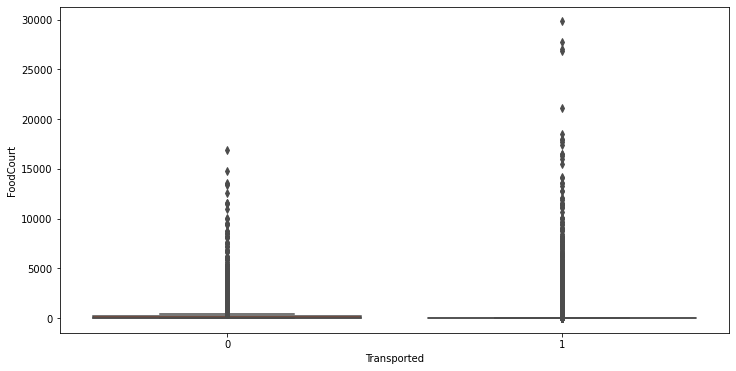

In [54]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='FoodCourt',
                color='orangered')

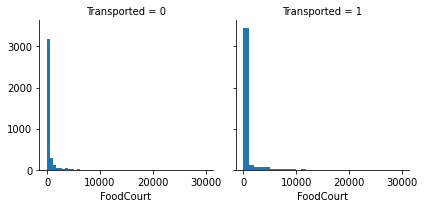

In [55]:
# distribuciones para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'FoodCourt', bins=30)
plt.show()

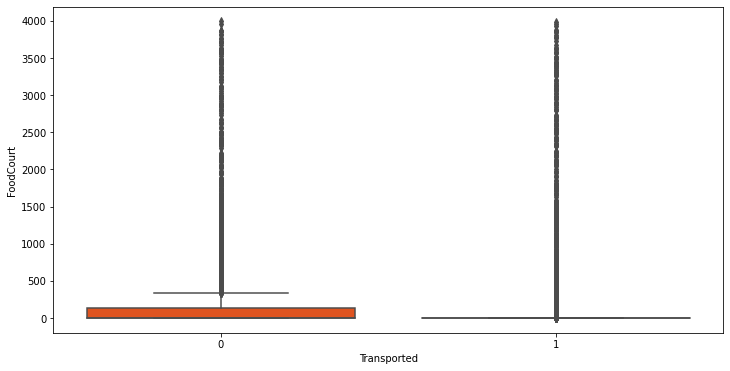

In [56]:
# Boxplots sin valores extremos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[df_train['FoodCourt']<4000], x='Transported', y='FoodCourt',
                color='orangered')

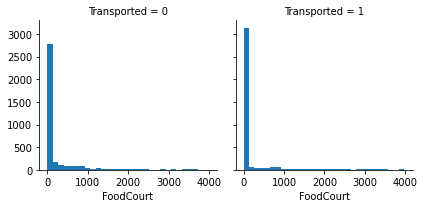

In [57]:
# distribuciones para los transportados y no transportados sin valores extremos
g = sns.FacetGrid(df_train[df_train['FoodCourt']<4000], col='Transported')
g.map(plt.hist, 'FoodCourt', bins=30)
plt.show()

**Podemos concluir que podría haber correlación entre las variables Transported y FoodCourt.**

## Transported vs. ShoppingMall

In [58]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['ShoppingMall'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3776.0,169.928761,467.013653,0.0,0.0,0.0,96.25,10705.0
1,3859.0,175.214563,702.853798,0.0,0.0,0.0,0.00,23492.0


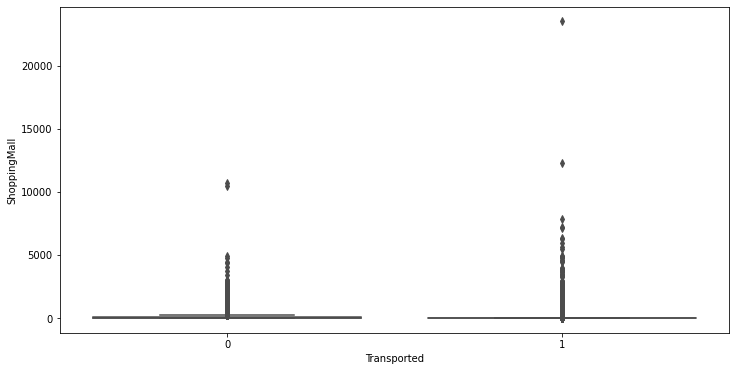

In [59]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='ShoppingMall',
                color='orangered')

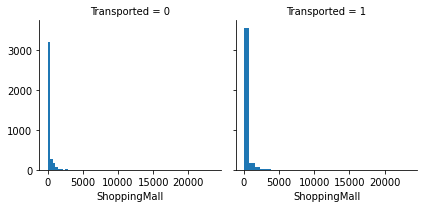

In [60]:
# distribuciones para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'ShoppingMall', bins=30)
plt.show()

In [61]:
# t test para diferencia de medias (n grande)
scipy.stats.ttest_ind(df_train[df_train['Transported']== 1]['ShoppingMall'],df_train[df_train['Transported']== 0]['ShoppingMall'], nan_policy='omit')

Ttest_indResult(statistic=0.386180026102484, pvalue=0.6993741089031031)

Como el p-valor del t-test para diferencia de medias de muestras independientes es mayor a 0.05, concluimos que NO hay diferencias significativas entre la media de gasto en ShoppingMall de los transportados y la media de gastos de ShoppingMall de los no transportados.

**Podemos concluir que NO hay correlación entre las variables Transported y ShoppingMall.**

## Trasported vs. Spa

In [62]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['Spa'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3779.0,553.589574,1552.267424,0.0,0.0,3.0,436.5,22408.0
1,3886.0,63.301081,269.317347,0.0,0.0,0.0,0.0,4103.0


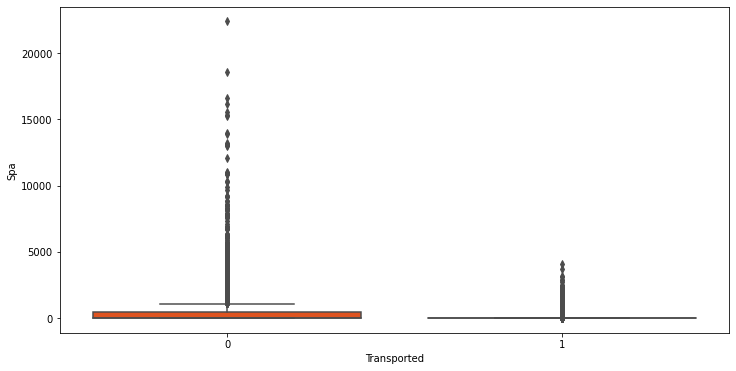

In [63]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='Spa',
                color='orangered')

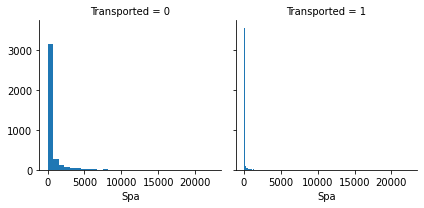

In [64]:
# distribuciones para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'Spa', bins=30)
plt.show()

In [65]:
# t test para diferencia de medias (n grande)
scipy.stats.ttest_ind(df_train[df_train['Transported']== 1]['Spa'],df_train[df_train['Transported']== 0]['Spa'], nan_policy='omit')

Ttest_indResult(statistic=-19.391776437153943, pvalue=8.083622697199985e-82)

Como el p-valor del t-test para diferencia de medias de muestras independientes es menor a 0.05, concluimos que hay diferencias significativas entre la media de gasto en Spa de los transportados y la media de gastos de Spa de los no transportados, siendo menor la media de gastos de Spa de los transportados. 

**Podemos concluir que hay correlación entre las variables Transported y Spa.**

## Transported vs. VRDeck

In [66]:
# Medidas resumen 
df_des = df_train.groupby('Transported')
df_des['VRDeck'].describe()

,count,mean,std,min,25%,50%,75%,max
Transported,,,,,,,,
0,3779.0,527.907912,1493.782174,0.0,0.0,1.0,392.0,24133.0
1,3875.0,68.803871,286.211402,0.0,0.0,0.0,0.0,4088.0


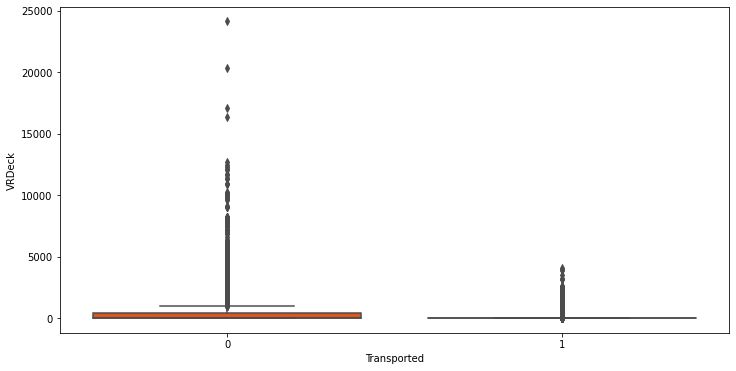

In [67]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='Transported', y='VRDeck',
                color='orangered')

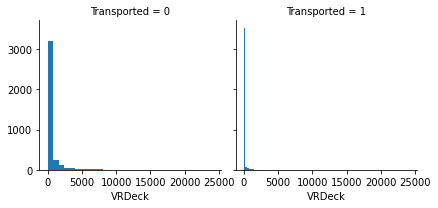

In [68]:
# distribuciones para los transportados y no transportados
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'VRDeck', bins=30)
plt.show()

In [69]:
# t test para diferencia de medias (n grande)
scipy.stats.ttest_ind(df_train[df_train['Transported']== 1]['VRDeck'],df_train[df_train['Transported']== 0]['VRDeck'], nan_policy='omit')

Ttest_indResult(statistic=-18.78175650386599, pvalue=5.626892997012489e-77)

Como el p-valor del t-test para diferencia de medias de muestras independientes es menor a 0.05, concluimos que hay diferencias significativas entre la media de gasto en VRDeck de los transportados y la media de gastos de VRDeck de los no transportados, siendo menor la media de gastos de VRDeck de los transportados. 

**Podemos concluir que hay correlación entre las variables Transported y VRDeck.**

**Del análisis de todos los gastos podemos concluir que los pasajeros que se transportan tienden a tener un menor gasto en promedio.**

## Expansión de Cabin

¿Qué información hay en la variable Cabin?

In [70]:
# Expandimos la variable Cabin en tres variables: Cubierta, Numero y Lado
df_train[['Cubierta', 'Numero', 'Lado']] = df_train['Cabin'].str.split('/', expand = True)
df_test[['Cubierta', 'Numero', 'Lado']] = df_test['Cabin'].str.split('/', expand = True)

### Trasported vs. Cubierta

In [71]:
# Frecuencias 
df_train['Cubierta'].value_counts()

F    2499
G    2294
E     792
B     698
C     680
D     435
A     237
T       4
Name: Cubierta, dtype: int64

In [72]:
## Tabla de contingencia
tabla=pd.crosstab(df_train.Cubierta, df_train.Transported, normalize=False)
tabla

Transported,0,1
Cubierta,,
A,115,122
B,186,512
C,214,466
D,246,189
E,506,286
F,1390,1109
G,1109,1185
T,3,1


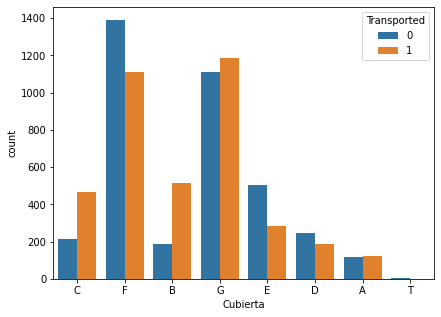

In [73]:
# Gráfico de barras Transported vs. HomePlanet
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['Cubierta'],hue=df_train['Transported'])

In [74]:
## Tabla de contingencia normalizada por planeta (filas)
pd.crosstab(df_train.Cubierta, df_train.Transported, normalize='index')

Transported,0,1
Cubierta,,
A,0.485232,0.514768
B,0.266476,0.733524
C,0.314706,0.685294
D,0.565517,0.434483
E,0.638889,0.361111
F,0.556222,0.443778
G,0.483435,0.516565
T,0.750000,0.250000


Las cubiertas B y C tienen una mayor proporción de pasajeros transportados en comparación con otras cubiertas.

**Podemos concluir que hay correlación entre las variables Transported y Cubierta.**

### Transported vs. Lado

In [75]:
# Frecuencias 
df_train['Lado'].value_counts()

S    3839
P    3800
Name: Lado, dtype: int64

In [76]:
## Tabla de contingencia
tabla=pd.crosstab(df_train.Lado, df_train.Transported, normalize=False)
tabla

Transported,0,1
Lado,,
P,2075,1725
S,1694,2145


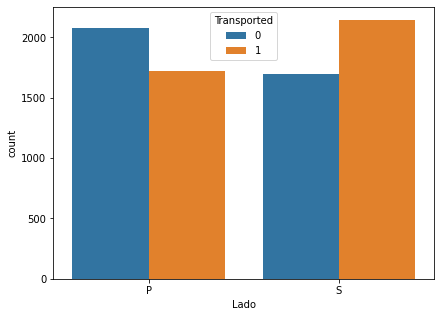

In [77]:
# Gráfico de barras Transported vs. HomePlanet
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df_train['Lado'],hue=df_train['Transported'])

In [78]:
## Tabla de contingencia normalizada por planeta (filas)
pd.crosstab(df_train.Lado, df_train.Transported, normalize='index')

Transported,0,1
Lado,,
P,0.546053,0.453947
S,0.441261,0.558739


Hay casi el mismo número de pasajeros asignados a las cabinas laterales de babor y estribor, y se transporta una mayor proporción de pasajeros en los camarotes del lado de estribor (S) en comparación con los pasajeros en los camarotes del lado de babor (P).

**Podemos concluir que hay correlación entre las variables Transported y Lado.**

## Conclusiones del análisis exploratorio

* Mas de la mitas de los pasajeros eran de la Tierra.
* 63% de los pasajeros de Europa fueron transportados en comparación con 52% de Marte y 43% de la Tierra.
* Un 36% de los pasajeros estaban en CryoSleep.
* El grupo de edad más joven, entre 0 y 9 años, tuvieron la mayor probabilidad de ser transportado.
* Casi nadie tenía pasaje VIP (98%).
* 37% de los pasajeros VIP fueron transportados, mientras que 51% de los pasajeron no VIP fueron transportados.
*  82% de los pasajeros puestos en CryoSleep fueron transportados, mientras que ~33% de los pasajeros que no estaban en CryoSleep fueron transportados.
* Más de la mitad de los pasajeros se dirigen a TRAPPIST-1e.
* Los pasajeros que se dirigían a 5 Cancri-e tuvieron más probabilidades de ser transportados en comparación con otros destinos.
* Los pasajeros que se transportan tenían menores gastos en promedio.
* Los gastos en ShoppingMall son similares en los trasportados y no trasportados.
* Las cubiertas B y C tuvieron mayor proporción de pasajeros transportados en comparación con otras cubiertas.
* Hubo casi el mismo número de pasajeros asignados a las cabinas laterales de babor y estribor.
* Se transportaron una mayor proporción de pasajeros en los camarotes del lado de estribor (S) en comparación con los pasajeros en los camarotes del lado de babor (P).

# Imputación de datos faltantes

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
# Recordemos las cantidades de datos faltantes
df_train.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
AgeGroup        162
Cubierta        184
Numero          184
Lado            184
dtype: int64

In [81]:
# Imputamos las variables categóricas por la moda y las numéricas por la mediana
for dataset in (df_train, df_test):
    dataset['HomePlanet'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['HomePlanet']).reshape(-1, 1))
    dataset['CryoSleep'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['CryoSleep']).reshape(-1, 1))
    dataset['Destination'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['Destination']).reshape(-1, 1))
    dataset['VIP'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['VIP']).reshape(-1, 1))
    dataset['Age'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['Age']).reshape(-1, 1))
    dataset['RoomService'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['RoomService']).reshape(-1, 1))
    dataset['FoodCourt'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['FoodCourt']).reshape(-1, 1))
    dataset['ShoppingMall'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['ShoppingMall']).reshape(-1, 1))
    dataset['Spa'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['Spa']).reshape(-1, 1))
    dataset['VRDeck'] = SimpleImputer(strategy="median").fit_transform(np.array(dataset['VRDeck']).reshape(-1, 1))
    dataset['Cubierta'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['Cubierta']).reshape(-1, 1))
    dataset['Lado'] = SimpleImputer(strategy="most_frequent").fit_transform(np.array(dataset['Lado']).reshape(-1, 1))

In [82]:
# Verificamos las cantidades de datos faltantes
df_train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           184
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            184
Transported       0
AgeGroup        162
Cubierta          0
Numero          184
Lado              0
dtype: int64

# Trasnformación de variables categóricas a numéricas

In [83]:
from sklearn.preprocessing import LabelEncoder

Tansformamos las variables categóricas a numéricas.

In [84]:
# Transformamos la variable HomePlanet
HP = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['HomePlanet'] = HP.fit_transform(dataset['HomePlanet'])

In [85]:
HP.inverse_transform([0,1,2])

array(['Earth', 'Europa', 'Mars'], dtype=object)

In [86]:
# Transformamos la variable CryoSleep
CS = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['CryoSleep'] = CS.fit_transform(dataset['CryoSleep'])

In [87]:
CS.inverse_transform([0,1])

array([False, True], dtype=object)

In [88]:
# Transformamos la variable Destination
D = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['Destination'] = D.fit_transform(dataset['Destination'])

In [89]:
D.inverse_transform([0,1,2])

array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'], dtype=object)

In [90]:
# Transformamos la variable VIP
V = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['VIP'] = V.fit_transform(dataset['VIP'])

In [91]:
V.inverse_transform([0,1])

array([False, True], dtype=object)

In [92]:
# Transformamos la variable Cubierta
CU = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['Cubierta'] = CU.fit_transform(dataset['Cubierta'])

In [93]:
CU.inverse_transform([0,1,2,3,4,5,6,7])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], dtype=object)

In [94]:
# Transformamos la variable Lado
L = LabelEncoder()
for dataset in (df_train, df_test):
    dataset['Lado'] = L.fit_transform(dataset['Lado'])

In [95]:
L.inverse_transform([0,1])

array(['P', 'S'], dtype=object)

In [96]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,Cubierta,Numero,Lado
0,3430,1,0,C/123/P,2,57.0,0,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,50-59,2,123,0
1,669,2,1,F/126/S,2,18.0,0,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,10-19,5,126,1
2,8430,1,1,B/343/S,2,33.0,0,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,30-39,1,343,1
3,6463,0,0,F/1420/P,2,43.0,0,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,40-49,5,1420,0
4,85,0,0,G/9/P,2,19.0,0,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,10-19,6,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,2,0,F/1319/S,2,12.0,0,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1,10-19,5,1319,1
7819,2693,0,0,G/459/S,2,44.0,0,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0,40-49,6,459,1
7820,8076,2,1,F/1772/P,2,55.0,0,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1,50-59,5,1772,0
7821,3829,0,0,E/253/P,2,15.0,0,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0,10-19,4,253,0


Eliminamos las variables PassengerId, Cabin, Name, Numero y ShoppingMall. Eliminamos ShoppingMall ya que en el análisis exploratorio no mostró asociación con la variable Transported.

In [97]:
# Guardamos la identificación de pasajeros en test 
PassengerID_val = df_test.PassengerId

In [98]:
# Eliminamos variables
drop_vars = ['PassengerId', 'Cabin', 'Name','AgeGroup', 'Numero','ShoppingMall']
drop_vars2 = ['PassengerId', 'Cabin', 'Name', 'Numero','ShoppingMall']

df_train = df_train.drop(drop_vars, axis=1)
df_test = df_test.drop(drop_vars2, axis=1)

In [99]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Transported,Cubierta,Lado
0,1,0,2,57.0,0,0.0,3859.0,195.0,3874.0,0,2,0
1,2,1,2,18.0,0,0.0,0.0,0.0,0.0,1,5,1
2,1,1,2,33.0,0,0.0,0.0,0.0,0.0,1,1,1
3,0,0,2,43.0,0,142.0,1208.0,0.0,204.0,0,5,0
4,0,0,2,19.0,0,0.0,0.0,1.0,34.0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7818,2,0,2,12.0,0,0.0,0.0,0.0,0.0,1,5,1
7819,0,0,2,44.0,0,0.0,0.0,62.0,3.0,0,6,1
7820,2,1,2,55.0,0,0.0,0.0,0.0,0.0,1,5,0
7821,0,0,2,15.0,0,0.0,840.0,0.0,20.0,0,4,0


# Normalizamos

Escalamos los datos restando la media y dividiendo por el desvío estándar (Normalización).

Antes de normalizar sacamos la variable Transported.

In [100]:
# Sacamos transported
df_train_sin = df_train.drop('Transported',axis=1)

In [101]:
from sklearn.preprocessing import StandardScaler
# Normalizamos df_train_sin
scaled_features_train = StandardScaler().fit_transform(df_train_sin.values)
df_train_escalado = pd.DataFrame(scaled_features_train, index=df_train_sin.index, columns=df_train_sin.columns)


In [102]:
# Normalizamos df_test
scaled_features_test = StandardScaler().fit_transform(df_test.values)
df_test_escalado = pd.DataFrame(scaled_features_test, index=df_test.index, columns=df_test.columns)

In [103]:
df_train_escalado

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,Spa,VRDeck,Cubierta,Lado
0,0.433235,-0.737504,0.622444,1.967465,-0.154767,-0.329239,2.124377,-0.092514,3.312022,-1.310594,-1.028924
1,1.689423,1.355926,0.622444,-0.757408,-0.154767,-0.329239,-0.278040,-0.266208,-0.267088,0.389513,0.971889
2,0.433235,1.355926,0.622444,0.290620,-0.154767,-0.329239,-0.278040,-0.266208,-0.267088,-1.877297,0.971889
3,-0.822954,-0.737504,0.622444,0.989305,-0.154767,-0.118291,0.473999,-0.266208,-0.078616,0.389513,-1.028924
4,-0.822954,-0.737504,0.622444,-0.687539,-0.154767,-0.329239,-0.278040,-0.265317,-0.235676,0.956215,-1.028924
...,...,...,...,...,...,...,...,...,...,...,...
7818,1.689423,-0.737504,0.622444,-1.176619,-0.154767,-0.329239,-0.278040,-0.266208,-0.267088,0.389513,0.971889
7819,-0.822954,-0.737504,0.622444,1.059174,-0.154767,-0.329239,-0.278040,-0.210982,-0.264316,0.956215,0.971889
7820,1.689423,1.355926,0.622444,1.827728,-0.154767,-0.329239,-0.278040,-0.266208,-0.267088,0.389513,-1.028924
7821,-0.822954,-0.737504,0.622444,-0.967013,-0.154767,-0.329239,0.244901,-0.266208,-0.248610,-0.177190,-1.028924


# Train test split

In [104]:
X = df_train_escalado
y = df_train.Transported

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [106]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6258, 11), (6258,), (1565, 11), (1565,))

In [107]:
y_train.sum()

3147

In [108]:
y_test.sum()

817

# Comparación de modelos

In [109]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, LeaveOneOut, LeavePOut
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


clfs =  [DecisionTreeClassifier(random_state=1),
        RandomForestClassifier(random_state=1),
        LogisticRegression(random_state=1),
        MLPClassifier(random_state=1),
        XGBClassifier(random_state=1),
        GaussianNB(),
        LinearSVC(random_state=1),
        SGDClassifier(random_state=1)]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'SVM',
        'SGDC']

trained_models = []
accuracy_models = []
for clf, name in zip(clfs, names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    test_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, test_predictions)
    print(f"Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    trained_models.append(clf)    
    accuracy_models.append(accuracy)

Arbol de decisión
Accuracy train Arbol de decisión: 95.05%
Accuracy test Arbol de decisión: 73.48%
Random Forest
Accuracy train Random Forest: 95.05%
Accuracy test Random Forest: 78.27%
Regresión Logística
Accuracy train Regresión Logística: 78.36%
Accuracy test Regresión Logística: 78.66%
Perceptrón multicapa


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy train Perceptrón multicapa: 80.97%
Accuracy test Perceptrón multicapa: 80.00%
XGBoost
Accuracy train XGBoost: 80.22%
Accuracy test XGBoost: 79.87%
Naive Bayes
Accuracy train Naive Bayes: 69.80%
Accuracy test Naive Bayes: 69.01%
SVM
Accuracy train SVM: 78.20%
Accuracy test SVM: 78.66%
SGDC
Accuracy train SGDC: 78.44%
Accuracy test SGDC: 79.04%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [110]:
# Accuracy de los diferentes modelos en el conjunto de test
models = pd.DataFrame({'Model':names, 'Score':accuracy_models})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Perceptrón multicapa,0.800000
4,XGBoost,0.798722
7,SGDC,0.790415
2,Regresión Logística,0.786581
6,SVM,0.786581
1,Random Forest,0.782748
0,Arbol de decisión,0.734824
5,Naive Bayes,0.690096


# Selección de hiperparámetros

In [111]:
from sklearn.model_selection import GridSearchCV

### Perceptron multicapa

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy train: 80.97%
Accuracy test: 80.00%


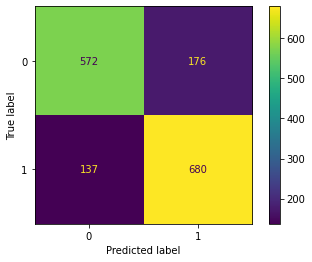

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       748
           1       0.79      0.83      0.81       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [112]:
# Perceptron multicapa con parámetros por default (hidden_layer_sizes = (100), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant)
clf = MLPClassifier(random_state=1).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

Accuracy train: 81.24%
Accuracy test: 80.38%


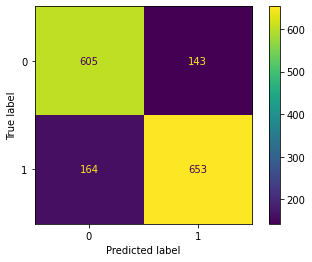

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       748
           1       0.82      0.80      0.81       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [113]:
# Perceptron multicapa con parámetros: max_iter=400
clf = MLPClassifier(max_iter=400, random_state=1).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy train: 81.78%
Accuracy test: 80.51%


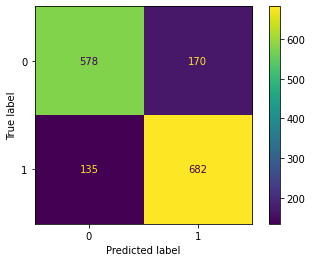

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       748
           1       0.80      0.83      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.80      0.80      1565
weighted avg       0.81      0.81      0.80      1565



In [114]:
# Perceptron multicapa con parámetros: max_iter=400 y activation = tanh
clf = MLPClassifier(max_iter=400, random_state=1, activation = 'tanh').fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [115]:
# Selección de hiperparámetros para Perceptrón multicapa (ESTO LLEVA MUCHO TIEMPO CON 100 ITERACIONES)
parameter_grid = {'hidden_layer_sizes':(10,100),
                'activation': ('identity', 'logistic','relu','tanh'),
                'solver': ('sgd', 'adam'),
                'alpha': np.logspace(-5,-2,3),
                'learning_rate': ('constant', 'adaptive')}

grid = GridSearchCV(MLPClassifier(max_iter=100), parameter_grid)
grid.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ('identity', 'logistic', 'relu', 'tanh'),
                         'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                         'hidden_layer_sizes': (10, 100),
                         'learning_rate': ('constant', 'adaptive'),
                         'solver': ('sgd', 'adam')})

In [116]:
# Mejores parámetros para Perceptrón multicapa
grid.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'solver': 'adam'}

Accuracy train: 80.35%
Accuracy test: 79.30%


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


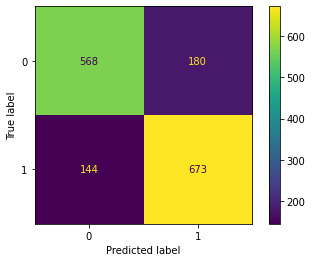

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       748
           1       0.79      0.82      0.81       817

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [117]:
clf = MLPClassifier(**grid.best_params_, random_state=1, max_iter=100).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

Accuracy train: 81.69%
Accuracy test: 81.15%


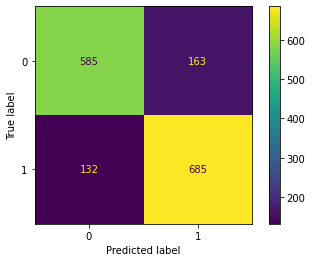

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       748
           1       0.81      0.84      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



In [118]:
# Perceptron multicapa con parámetros: max_iter=400, alpha=0.01 y activation = tanh
clf = MLPClassifier(max_iter=400, random_state=1, activation = 'tanh', alpha= 0.01).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### XGBoost

In [119]:
# Selección de hiperparámetros para XGBoost
parameter_gridXG = {'objective':('reg:logistic','binary:logistic','binary:hinge'),
                'max_depth': (6, 10, 20),
                'alpha': np.logspace(-5,-2,3)}
                

gridXG = GridSearchCV(XGBClassifier(learning_rate= 0.01, random_state=1), parameter_gridXG)
gridXG.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(learning_rate=0.01, random_state=1),
             param_grid={'alpha': array([1.00000000e-05, 3.16227766e-04, 1.00000000e-02]),
                         'max_depth': (6, 10, 20),
                         'objective': ('reg:logistic', 'binary:logistic',
                                       'binary:hinge')})

In [120]:
# Mejores parámetros para XGBoost
gridXG.best_params_

{'alpha': 1e-05, 'max_depth': 10, 'objective': 'reg:logistic'}

Accuracy train: 90.24%
Accuracy test: 79.49%


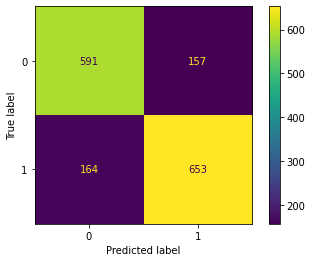

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       748
           1       0.81      0.80      0.80       817

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [121]:
clf = XGBClassifier(**gridXG.best_params_, random_state=1).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### SGDC

In [122]:
gridSGDC = GridSearchCV(SGDClassifier(random_state=1),
    {'loss': ('hinge', 'log'),
    'learning_rate': ('constant','optimal'),
    'penalty' : ('l2', 'l1', 'elasticnet'),
    'alpha': (0.000001, 0.0001, 0.001, 0.01, 1, 10, 100.0),})
gridSGDC.fit(x_train,y_train)
gridSGDC.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
210 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 649, in _fit
    self._validate_params()
  File "/usr/local/lib/python3.

{'alpha': 0.0001,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'penalty': 'elasticnet'}

Accuracy train Arbol de decisión: 78.28%
Accuracy test Arbol de decisión: 79.04%


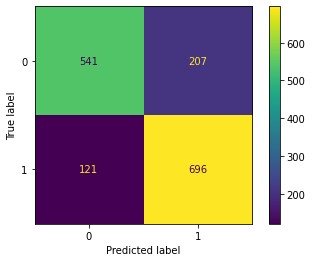

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       748
           1       0.77      0.85      0.81       817

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [123]:
clf = SGDClassifier(**gridSGDC.best_params_,random_state=1).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### Arbol de decisión

In [124]:
gridA = GridSearchCV(DecisionTreeClassifier(random_state=1),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
gridA.fit(x_train,y_train)
gridA.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 83.57%
Accuracy test Arbol de decisión: 76.55%


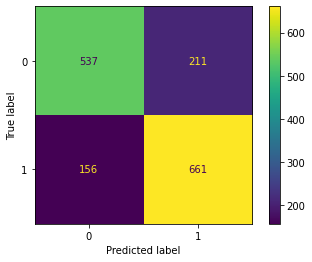

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       748
           1       0.76      0.81      0.78       817

    accuracy                           0.77      1565
   macro avg       0.77      0.76      0.76      1565
weighted avg       0.77      0.77      0.76      1565



In [125]:
clf = DecisionTreeClassifier(**gridA.best_params_,random_state=1).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

# Selección de modelo final y análisis de resultados

A partir de los análisis de modelos e hiperparámetros elegimos el modelo Perceptrón multicapa con parámetros max_iter=400, alpha=0.01 y activation = tanh ya que tuvo una mejor accuracy en el cunjunto de evaluación (81,15%).

In [126]:
clf = MLPClassifier(max_iter=400, random_state=1, activation = 'tanh', alpha=0.01)
clf = clf.fit(x_train, y_train)
test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
accuracy*100

81.15015974440894

In [127]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       748
           1       0.81      0.84      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



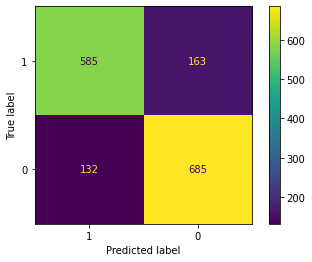

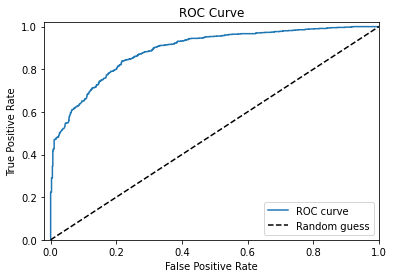

In [128]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions, display_labels=(1,0))
plt.show()

fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [129]:
roc_auc_score(y_test, test_predictions)

0.810259427015493

# Entrega

In [130]:
submission = pd.DataFrame({
        "PassengerId": PassengerID_val,
        "Transported": clf.predict(df_test_escalado)
    })
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [131]:
# Descargamos el nuevo conjunto de datos
from google.colab import files
files.download('submission.csv') 